<a href="https://colab.research.google.com/github/abd-ul-rasheed/CODSOFT/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

file_path = 'Churn_Modelling.csv'
data = pd.read_csv(file_path)

df = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_train[numerical_features] = numerical_pipeline.fit_transform(X_train[numerical_features])
X_test[numerical_features] = numerical_pipeline.transform(X_test[numerical_features])

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])
    label_encoders[feature] = le

X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9136,-0.575582,0,1,-1.796679,-0.349474,0.312906,-0.912483,1,0,1.362512
6410,0.398182,2,0,2.269825,-1.386929,-1.223574,0.799493,1,1,1.515472
2607,1.693082,0,1,-0.756410,-1.386929,0.682321,-0.912483,1,0,0.038955
3201,0.740036,0,1,-1.796679,0.342162,-1.223574,0.799493,1,0,1.671444
3330,0.905783,0,1,-1.985818,-0.349474,-1.223574,0.799493,1,1,-0.899384


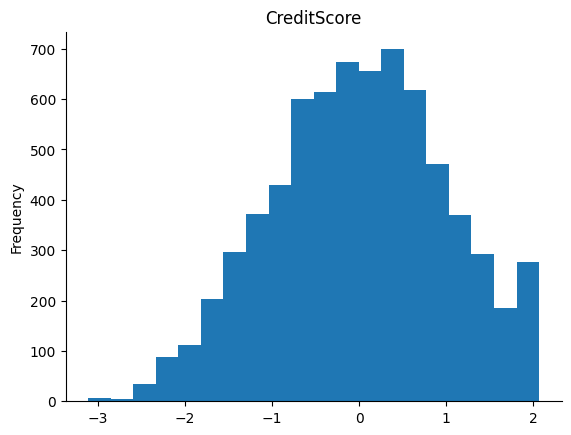

In [ ]:
X_train['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [ ]:
log_reg_report = classification_report(y_test, y_pred_log_reg, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
gb_report = classification_report(y_test, y_pred_gb, output_dict=True)

log_reg_roc_auc = roc_auc_score(y_test, y_pred_log_reg)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
gb_roc_auc = roc_auc_score(y_test, y_pred_gb)

log_reg_report['roc_auc'] = log_reg_roc_auc
rf_report['roc_auc'] = rf_roc_auc
gb_report['roc_auc'] = gb_roc_auc

print("Logistic Regression")
print(log_reg_report)
print("ROC AUC:", log_reg_roc_auc)

print("\nRandom Forest")
print(rf_report)
print("ROC AUC:", rf_roc_auc)

print("\nGradient Boosting")
print(gb_report)
print("ROC AUC:", gb_roc_auc)

Logistic Regression
{'0': {'precision': 0.8209164043371808, 'recall': 0.9824194223524487, 'f1-score': 0.8944359756097561, 'support': 2389}, '1': {'precision': 0.7021276595744681, 'recall': 0.16202945990180032, 'f1-score': 0.26329787234042556, 'support': 611}, 'accuracy': 0.8153333333333334, 'macro avg': {'precision': 0.7615220319558245, 'recall': 0.5722244411271246, 'f1-score': 0.5788669239750908, 'support': 3000}, 'weighted avg': {'precision': 0.7967230966538417, 'recall': 0.8153333333333334, 'f1-score': 0.7658941819105691, 'support': 3000}, 'roc_auc': 0.5722244411271246}
ROC AUC: 0.5722244411271246

Random Forest
{'0': {'precision': 0.8769523809523809, 'recall': 0.9635830891586438, 'f1-score': 0.9182289589150379, 'support': 2389}, '1': {'precision': 0.768, 'recall': 0.4713584288052373, 'f1-score': 0.5841784989858012, 'support': 611}, 'accuracy': 0.8633333333333333, 'macro avg': {'precision': 0.8224761904761905, 'recall': 0.7174707589819406, 'f1-score': 0.7512037289504195, 'support': 

In [ ]:
sample_size = 10
samples = X_test.sample(sample_size, random_state=42)

print("Sample Predictions:")
print(f"{'Index':<10} {'Actual':<10} {'LogReg':<10} {'RandomForest':<15} {'GradBoosting':<15}")
for i in range(len(samples)):
    index = samples.index[i]
    actual = y_test.loc[index]
    pred_log_reg = y_pred_log_reg[i]
    pred_rf = y_pred_rf[i]
    pred_gb = y_pred_gb[i]
    print(f"{index:<10} {actual:<10} {pred_log_reg:<10} {pred_rf:<15} {pred_gb:<15}")

Sample Predictions:
Index      Actual     LogReg     RandomForest    GradBoosting   
1615       0          0          0               0              
658        0          0          0               0              
2485       0          0          0               0              
5246       0          0          0               0              
5642       0          0          0               1              
2022       0          0          0               0              
165        0          0          0               0              
54         1          0          1               1              
8042       1          0          0               0              
2565       0          0          0               0              


In [ ]:
def print_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

print_metrics(y_test, y_pred_log_reg, "Logistic Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_gb, "Gradient Boosting")

--- Logistic Regression ---
Accuracy: 0.8153
Precision: 0.7021
Recall: 0.1620
F1 Score: 0.2633
ROC AUC: 0.5722

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      2389
           1       0.70      0.16      0.26       611

    accuracy                           0.82      3000
   macro avg       0.76      0.57      0.58      3000
weighted avg       0.80      0.82      0.77      3000

--- Random Forest ---
Accuracy: 0.8633
Precision: 0.7680
Recall: 0.4714
F1 Score: 0.5842
ROC AUC: 0.7175

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.77      0.47      0.58       611

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

--- Gradient Boosting ---
Accuracy: 0.8703
Precision: 0.8016
Recall: 0.4828
F1 S